In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Define paths
train_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
test_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/test'
val_dir = '/kaggle/input/guava-fruit-disease-dataset/Guava Fruit Disease Dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'


Training set counts: {'Anthracnose': 1080, 'fruit_fly': 918, 'healthy_guava': 649}
Validation set counts: {'Anthracnose': 308, 'fruit_fly': 262, 'healthy_guava': 185}
Test set counts: {'Anthracnose': 156, 'fruit_fly': 132, 'healthy_guava': 94}


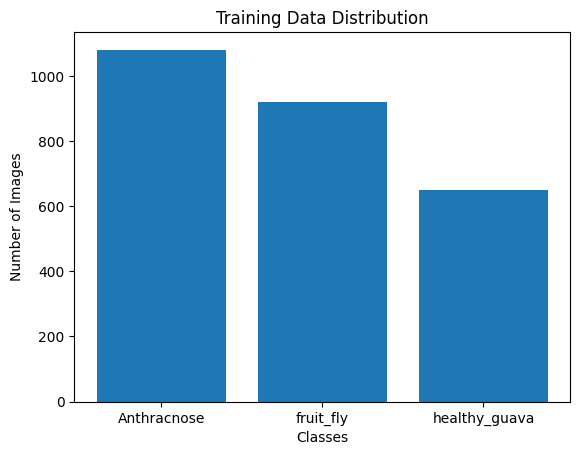

In [3]:
# Image dimensions
img_height = 224
img_width = 224
batch_size = 32
# Function to count images in each class
def count_images(directory):
    classes = ['Anthracnose', 'fruit_fly', 'healthy_guava']
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    return counts

# Count images in train, test, and validation sets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
val_counts = count_images(val_dir)

# Print the counts
print("Training set counts:", train_counts)
print("Validation set counts:", val_counts)
print("Test set counts:", test_counts)

# Plot bar chart for training set
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()


In [4]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)


Found 2647 images belonging to 3 classes.
Found 755 images belonging to 3 classes.
Found 382 images belonging to 3 classes.


In [6]:
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, InceptionV3, DenseNet121, DenseNet169, Xception
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix

# Function to create a model with a pretrained base
def create_model(pretrained_model, num_classes):
    base_model = pretrained_model(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

In [7]:

# List of pretrained models to test
models_to_test = {
    'VGG16': VGG16,
    'VGG19': VGG19,
    'ResNet50': ResNet50,
    'ResNet101': ResNet101,
    'InceptionV3': InceptionV3,
    'DenseNet121': DenseNet121,
    'DenseNet169': DenseNet169,
    'Xception': Xception
}


In [9]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,  # Stop training when validation loss stops improving for 10 epochs
    restore_best_weights=True,  # Restore weights from the best epoch
    verbose=1
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',  # Save the best model to this file
    save_best_only=True,  # Only save the model if the validation loss improves
    monitor='val_loss'   # Monitor validation loss
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor=0.1,  # Reduce learning rate by a factor of 10
    patience=5,  # After 5 epochs of no improvement
    min_lr=1e-5,  # Do not reduce the learning rate below this value
    verbose=1
)



Training and evaluating model: VGG16
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733432075.760750     125 service.cc:145] XLA service 0x796a0c00e740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733432075.760839     125 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/83 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.2969 - loss: 1.1854  

I0000 00:00:1733432085.034649     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 79s 782ms/step - accuracy: 0.6645 - loss: 0.7482 - val_accuracy: 0.9457 - val_loss: 0.2016 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 299ms/step - accuracy: 0.9617 - loss: 0.1495 - val_accuracy: 0.9642 - val_loss: 0.1354 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 303ms/step - accuracy: 0.9709 - loss: 0.1042 - val_accuracy: 0.9629 - val_loss: 0.1120 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 292ms/step - accuracy: 0.9706 - loss: 0.0807 - val_accuracy: 0.9589 - val_loss: 0.1078 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 295ms/step - accuracy: 0.9708 - loss: 0.0737 - val_accuracy: 0.9669 - val_loss: 0.0832 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 295ms/step - accuracy: 0.9865 - loss: 0.0518 - val_accuracy: 0.9735 - val_loss: 0.0695 - learning_rate: 0.0010
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 289ms/step - accuracy: 0.9839 - loss: 0.0465 - val_

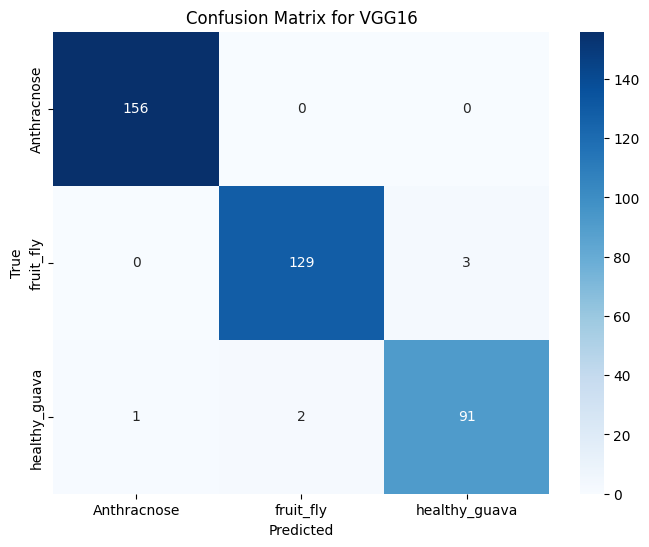


Training and evaluating model: VGG19
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 30s 319ms/step - accuracy: 0.6687 - loss: 0.7667 - val_accuracy: 0.9391 - val_loss: 0.2153 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 292ms/step - accuracy: 0.9386 - loss: 0.2026 - val_accuracy: 0.9536 - val_loss: 0.1520 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step - accuracy: 0.9445 - loss: 0.1436 - val_accuracy: 0.9523 - val_loss: 0.1617 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 292ms/step - accuracy: 0.9624 - loss: 0.1004 - val_accuracy: 0.9695 - val_loss: 0.0822 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 296ms/step - accuracy: 0.9773 - loss: 0.0747 - val_accuracy: 0.9563 - val_loss: 0.1109 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 330ms/step - accuracy: 0.9786 - loss: 0.0598 - val_accuracy: 0.9642 - val_loss: 0.1043 - learning_rate: 

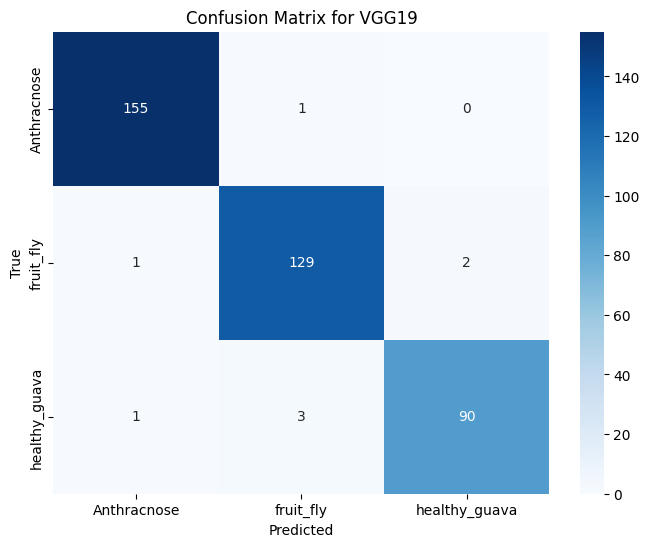


Training and evaluating model: ResNet50
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 46s 415ms/step - accuracy: 0.4374 - loss: 1.0822 - val_accuracy: 0.6715 - val_loss: 0.8457 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.5920 - loss: 0.8470 - val_accuracy: 0.6477 - val_loss: 0.8424 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.6821 - loss: 0.7585 - val_accuracy: 0.6795 - val_loss: 0.7128 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 299ms/step - accuracy: 0.7102 - loss: 0.6577 - val_accuracy: 0.7364 - val_loss: 0.6260 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.7364 - loss: 0.6476 - val_accuracy: 0.7629 - val_loss: 0.5797 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.7555 - loss: 0.6166 - val_accuracy: 0.7020 - val_loss: 0.6696 - learning_rat

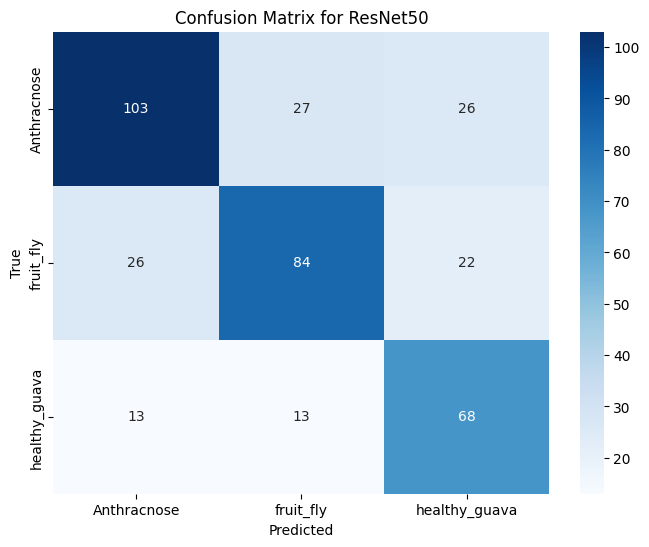


Training and evaluating model: ResNet101
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 57s 486ms/step - accuracy: 0.4865 - loss: 1.0162 - val_accuracy: 0.6000 - val_loss: 0.8318 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.6667 - loss: 0.7584 - val_accuracy: 0.6980 - val_loss: 0.6871 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.7085 - loss: 0.6865 - val_accuracy: 0.7523 - val_loss: 0.6056 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 309ms/step - accuracy: 0.7464 - loss: 0.6159 - val_accuracy: 0.7947 - val_loss: 0.5603 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.7475 - loss: 0.6245 - val_accuracy: 0.7589 - val_loss: 0.5825 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 28s 310ms/step - accuracy: 0.7750 - loss: 0.5769 - val_accuracy: 0.7166 - val_loss: 0.6683 - learning_

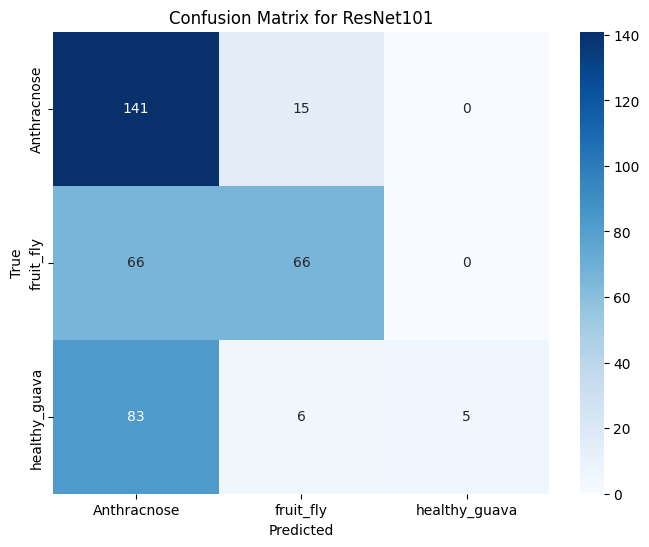


Training and evaluating model: InceptionV3
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 56s 495ms/step - accuracy: 0.8072 - loss: 0.4642 - val_accuracy: 0.9457 - val_loss: 0.1435 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 305ms/step - accuracy: 0.9485 - loss: 0.1439 - val_accuracy: 0.9709 - val_loss: 0.0725 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 294ms/step - accuracy: 0.9831 - loss: 0.0506 - val_accuracy: 0.9682 - val_loss: 0.0724 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 299ms/step - accuracy: 0.9868 - loss: 0.0399 - val_accuracy: 0.9351 - val_loss: 0.1912 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 309ms/step - accuracy: 0.9766 - loss: 0.0609 - val_accuracy: 0.9748 - val_loss: 0.0759 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accuracy: 0.9656 - val_loss: 0.0849 - learning_

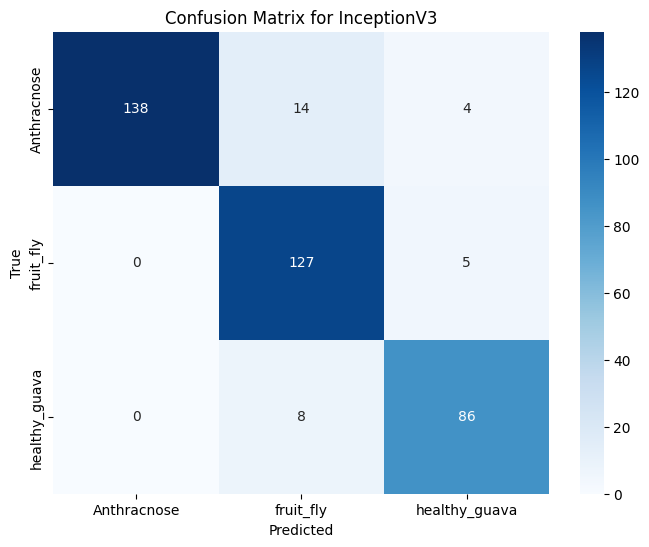


Training and evaluating model: DenseNet121
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 90s 769ms/step - accuracy: 0.8211 - loss: 0.3936 - val_accuracy: 0.9881 - val_loss: 0.0392 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 321ms/step - accuracy: 0.9838 - loss: 0.0621 - val_accuracy: 0.9907 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 30s 334ms/step - accuracy: 0.9799 - loss: 0.0546 - val_accuracy: 0.9868 - val_loss: 0.0311 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 30s 337ms/step - accuracy: 0.9956 - loss: 0.0200 - val_accuracy: 0.9960 - val_loss: 0.0128 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 328ms/step - accuracy: 0.9965 - loss: 0.0083 - val_accuracy: 0.9960 - val_loss: 0.0134 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 330ms/step - accuracy: 0.9972 - loss: 0.0078 - val_accuracy: 0.9881 - val_loss: 0.0269 - learning_

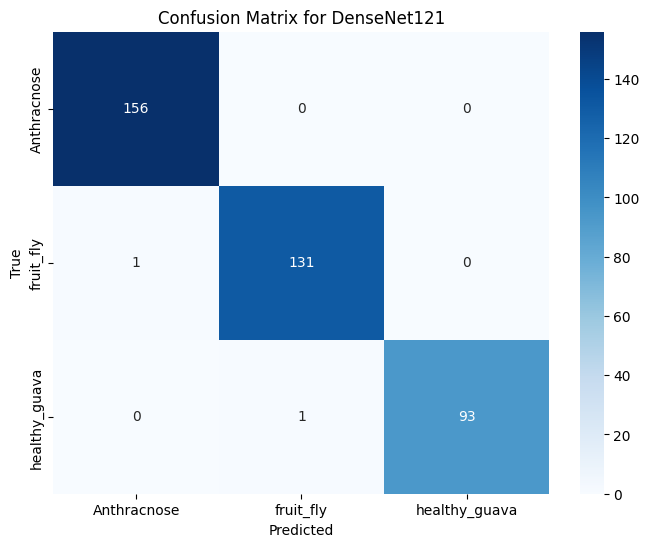


Training and evaluating model: DenseNet169
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
 2/83 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.4062 - loss: 1.0792  

I0000 00:00:1733434061.976285     125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 8 bytes spill stores, 8 bytes spill loads



62/83 ━━━━━━━━━━━━━━━━━━━━ 9s 454ms/step - accuracy: 0.7830 - loss: 0.4921 

I0000 00:00:1733434089.639743     125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 8 bytes spill stores, 8 bytes spill loads



83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8148 - loss: 0.4281

I0000 00:00:1733434106.085849     125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1733434120.503764     125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 8 bytes spill stores, 8 bytes spill loads



83/83 ━━━━━━━━━━━━━━━━━━━━ 88s 716ms/step - accuracy: 0.8160 - loss: 0.4255 - val_accuracy: 0.9788 - val_loss: 0.0525 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 332ms/step - accuracy: 0.9806 - loss: 0.0453 - val_accuracy: 0.9841 - val_loss: 0.0394 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 328ms/step - accuracy: 0.9890 - loss: 0.0257 - val_accuracy: 0.9921 - val_loss: 0.0288 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 30s 336ms/step - accuracy: 0.9899 - loss: 0.0242 - val_accuracy: 0.9695 - val_loss: 0.0673 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 30s 348ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9894 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.9947 - val_loss: 0.0227 - learning_rate: 0.0010
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.9989 - loss: 0.0041 - val_

I0000 00:00:1733434391.971451     128 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 8 bytes spill stores, 8 bytes spill loads



Test Accuracy for DenseNet169: 0.9869
 1/12 ━━━━━━━━━━━━━━━━━━━━ 2:08 12s/step

I0000 00:00:1733434404.257687     125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 8 bytes spill stores, 8 bytes spill loads



12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step 


I0000 00:00:1733434419.039173     126 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 8 bytes spill stores, 8 bytes spill loads



Classification Report for DenseNet169:
               precision    recall  f1-score   support

  Anthracnose       0.99      1.00      1.00       156
    fruit_fly       0.97      1.00      0.99       132
healthy_guava       1.00      0.95      0.97        94

     accuracy                           0.99       382
    macro avg       0.99      0.98      0.98       382
 weighted avg       0.99      0.99      0.99       382



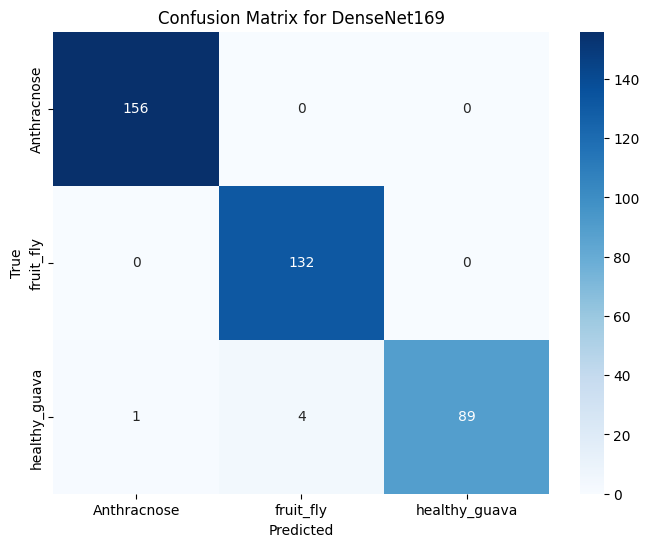


Training and evaluating model: Xception
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 432ms/step - accuracy: 0.8071 - loss: 0.4384 - val_accuracy: 0.9430 - val_loss: 0.1201 - learning_rate: 0.0010
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 28s 323ms/step - accuracy: 0.9503 - loss: 0.1301 - val_accuracy: 0.9695 - val_loss: 0.0697 - learning_rate: 0.0010
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 327ms/step - accuracy: 0.9802 - loss: 0.0583 - val_accuracy: 0.9722 - val_loss: 0.0732 - learning_rate: 0.0010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 329ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9735 - val_loss: 0.0625 - learning_rate: 0.0010
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - accuracy: 0.9887 - loss: 0.0295 - val_accuracy: 0.9775 - val_loss: 0.0521 - learning_rate: 0.0010
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.9956 - loss: 0.0148 - val_accuracy: 0.9629 - val_loss: 0.0866 - learning_rat

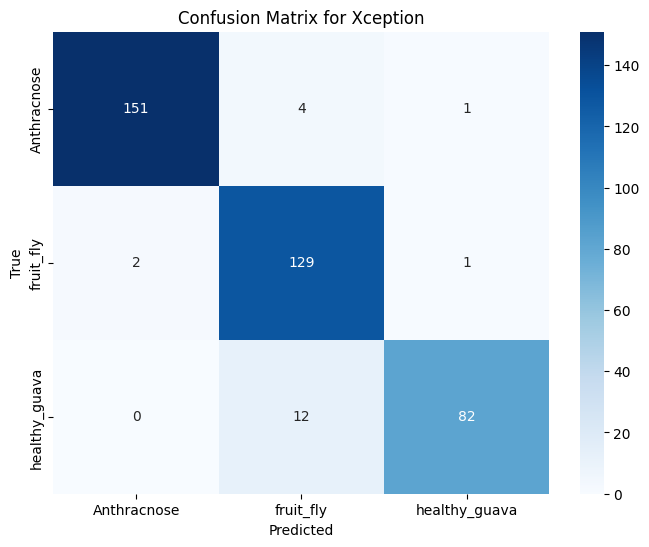

In [10]:
# Results storage
results = {}

# Train and evaluate each model
for model_name, model_fn in models_to_test.items():
    print(f"\nTraining and evaluating model: {model_name}")
    model = create_model(model_fn, num_classes=3)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_generator,
                        epochs=10,
                        validation_data=validation_generator,
                        callbacks=[early_stopping, checkpoint, reduce_lr])
    
    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f'Test Accuracy for {model_name}: {test_accuracy:.4f}')
    
    # Predictions
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    
    # Classification report
    report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys(), output_dict=True)
    
    # Store metrics
    results[model_name] = {
        'accuracy': test_accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }

    # Display classification report
    print(f'Classification Report for {model_name}:')
    print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))
    
    # Confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
# Summarize results
print("\nSummary of results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy={metrics['accuracy']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, F1 Score={metrics['f1_score']:.4f}")
